 CNSAAR Stroke Risk Detection and Visualization Notebook
 Author: Manik
# Date: [Today's Date]

# Cell 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')


# Cell 2: CNSAARDetector Class

In [3]:
class CNSAARDetector:
    def __init__(self):
        self.model = None
        self.scaler = StandardScaler()
        self.features = [
            'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
            'bmi', 'gender', 'smoking_status'
        ]
        
    def load_data(self, filepath):
        """Load and preprocess the dataset"""
        data = pd.read_csv(filepath)
        
        # Preprocessing
        data['gender'] = data['gender'].map({'Male': 1, 'Female': 0, 'Other': 0})
        data['smoking_status'] = data['smoking_status'].map({
            'formerly smoked': 1,
            'never smoked': 0,
            'smokes': 2,
            'Unknown': 0
        })
        data['bmi'].fillna(data['bmi'].mean(), inplace=True)
        
        return data
    
    def train_model(self, data):
        """Train the Random Forest classifier"""
        X = data[self.features]
        y = data['stroke']
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        # Scale features
        X_train = self.scaler.fit_transform(X_train)
        X_test = self.scaler.transform(X_test)
        
        # Train model
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        self.model.fit(X_train, y_train)
        
        # Evaluate
        y_pred = self.model.predict(X_test)
        print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title("Confusion Matrix")
        plt.show()
        
        # Feature Importances
        importances = self.model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10,6))
        sns.barplot(x=importances[indices], y=np.array(self.features)[indices])
        plt.title("Feature Importances")
        plt.show()
        
    def predict_stroke_risk(self, patient_data):
        """Predict stroke risk for a new patient"""
        if self.model is None:
            raise Exception("Model not trained. Please train the model first.")
        
        df = pd.DataFrame([patient_data])
        df['gender'] = df['gender'].map({'Male': 1, 'Female': 0, 'Other': 0})
        df['smoking_status'] = df['smoking_status'].map({
            'formerly smoked': 1,
            'never smoked': 0,
            'smokes': 2,
            'Unknown': 0
        })
        
        X = self.scaler.transform(df[self.features])
        proba = self.model.predict_proba(X)[0][1]
        
        return {
            'stroke_risk': proba,
            'risk_level': 'High' if proba >= 0.5 else 'Medium' if proba >= 0.3 else 'Low'
        }
    
    def save_model(self, filename):
        joblib.dump({
            'model': self.model,
            'scaler': self.scaler,
            'features': self.features
        }, filename)
    
    def load_saved_model(self, filename):
        saved_data = joblib.load(filename)
        self.model = saved_data['model']
        self.scaler = saved_data['scaler']
        self.features = saved_data['features']


# Cell 3: Initialize Detector and Train


Data loaded successfully. Training model...
Model Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       223
           1       0.56      0.30      0.39        77

    accuracy                           0.76       300
   macro avg       0.68      0.61      0.62       300
weighted avg       0.73      0.76      0.73       300



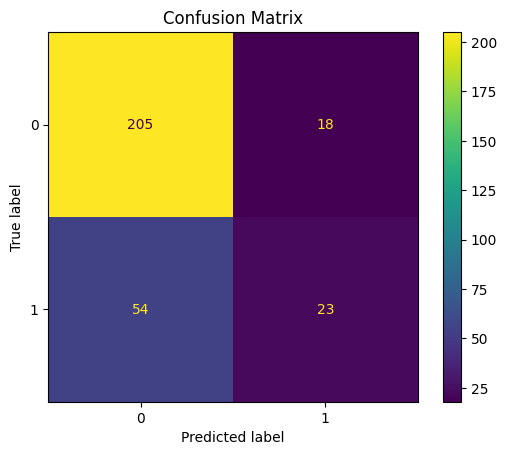

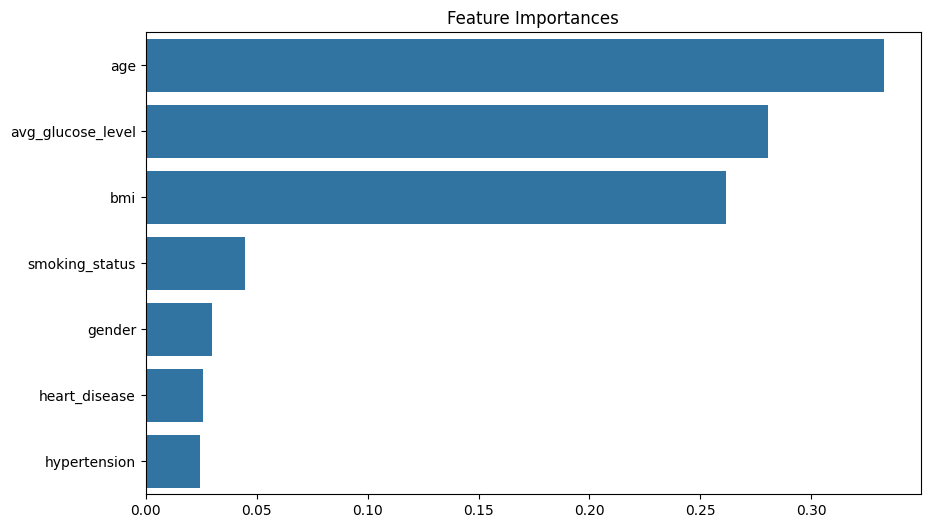


Stroke Risk Prediction: 68.0% (High risk)


In [4]:
file_path = r"C:\Users\manik\OneDrive\Desktop\cap1\health_records_1500.csv"
detector = CNSAARDetector()
data = detector.load_data(file_path)
print("Data loaded successfully. Training model...")
detector.train_model(data)
detector.save_model('cnsaar_model.joblib')

# Cell 4: Sample Prediction
patient = {
    'age': 67,
    'hypertension': 1,
    'heart_disease': 1,
    'avg_glucose_level': 228.69,
    'bmi': 36.6,
    'gender': 'Male',
    'smoking_status': 'formerly smoked'
}

result = detector.predict_stroke_risk(patient)
print(f"\nStroke Risk Prediction: {result['stroke_risk']*100:.1f}% ({result['risk_level']} risk)")


# Cell 5: Data Visualization

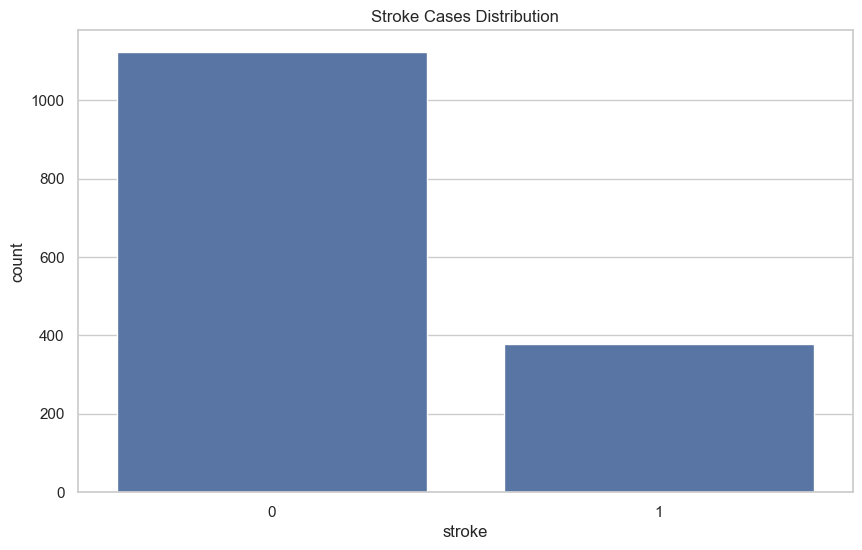

In [5]:
sns.set(style="whitegrid")

# Stroke Cases Distribution
plt.figure(figsize=(10,6))
sns.countplot(x='stroke', data=data)
plt.title("Stroke Cases Distribution")
plt.show()


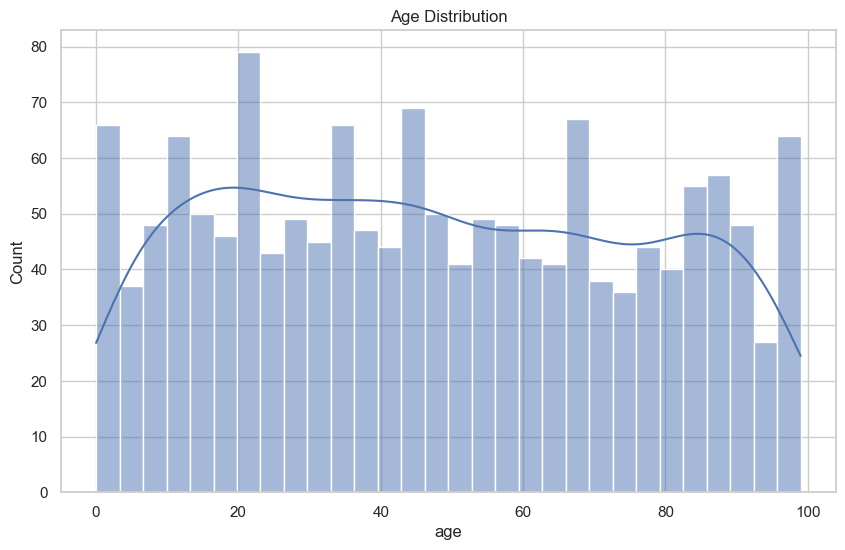

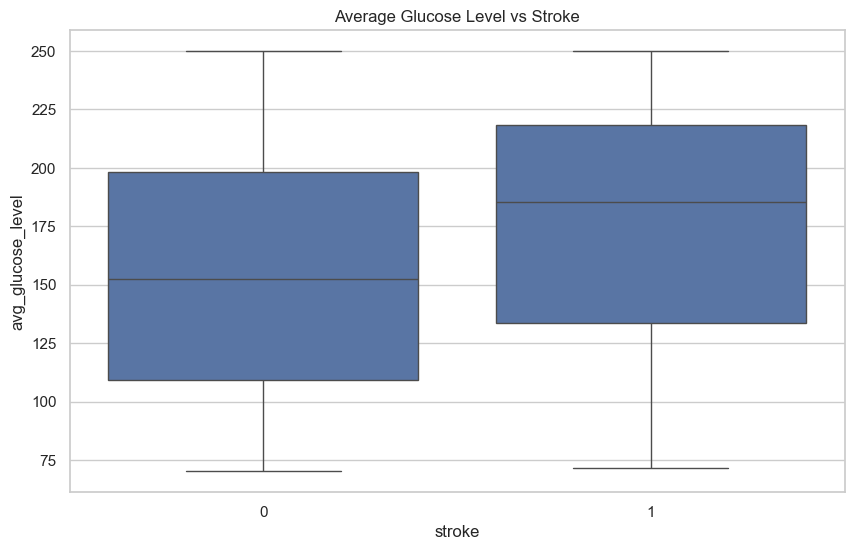

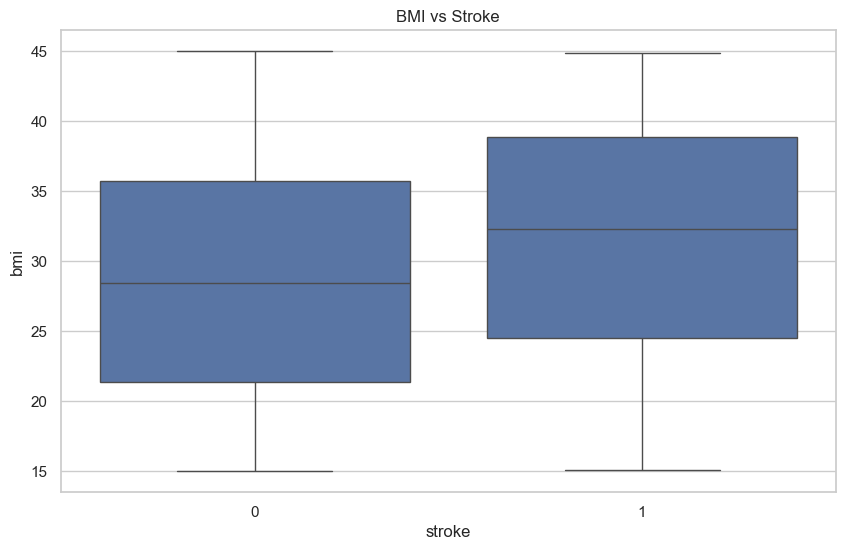

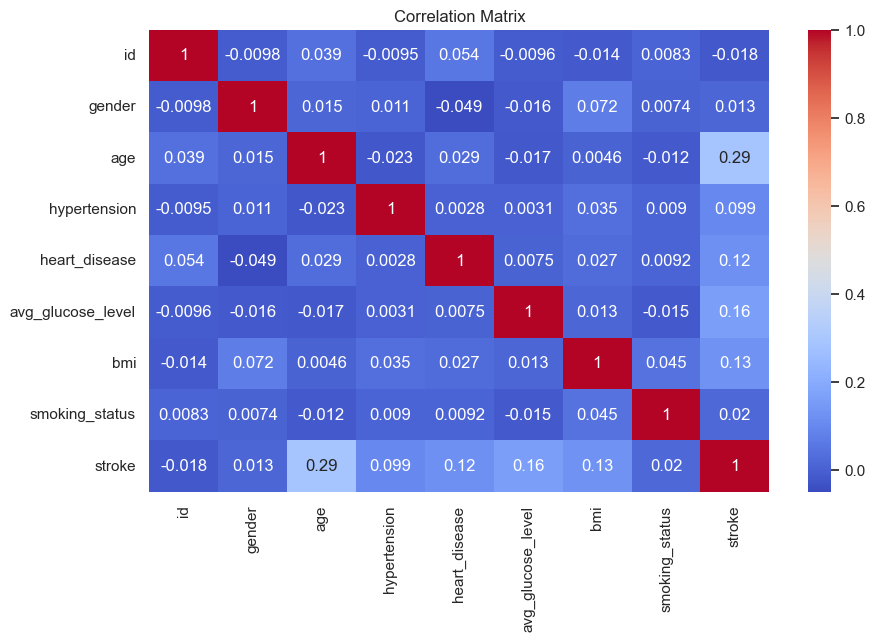

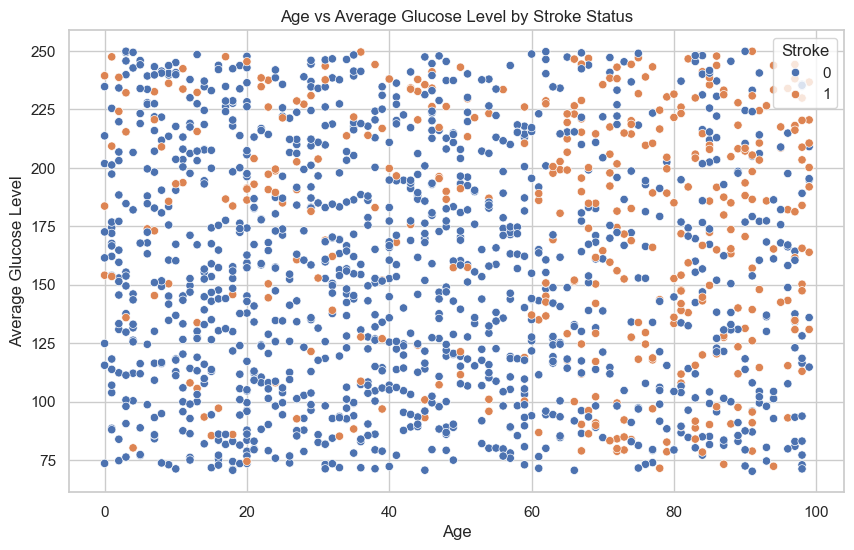

In [6]:
# Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Average Glucose Level vs Stroke
plt.figure(figsize=(10,6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=data)
plt.title("Average Glucose Level vs Stroke")
plt.show()

# BMI vs Stroke
plt.figure(figsize=(10,6))
sns.boxplot(x='stroke', y='bmi', data=data)
plt.title("BMI vs Stroke")
plt.show()

# Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Age vs Average Glucose Level by Stroke Status scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', data=data, palette='deep')
plt.title("Age vs Average Glucose Level by Stroke Status")
plt.xlabel("Age")
plt.ylabel("Average Glucose Level")
plt.legend(title='Stroke')
plt.show()
